# Revisa la arquitectura de Hadoop


- **HDFS**: Hadoop Distributed File System
- **YARN**: Yet Another Resource Negotiator, gestiona cómo se ejecutan tareas en un cluster
- **MapReduce**: Usa YARN para coordinar tareas map y tareas reduce

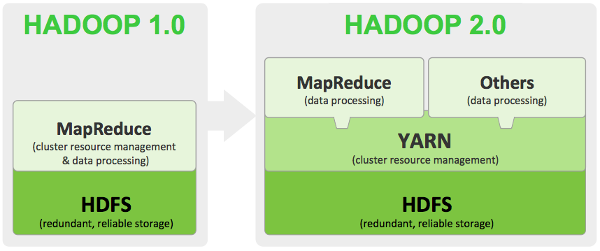

In [2]:
from IPython.display import Image
Image(filename='imgs/yarn.png') 

A nivel de infraestructura, tanto HDFS como YARN tienen un componente central de gestión, como agentes en cada nodo. Es importante observar que en Hadoop **TODOS LOS NODOS DAN SERVICIO DE CÓMPUTO Y DE ALMACENAMIENTO**

- **YARN**: el Resource Manager se encarga de sincronizar las tareas que se mandan a los nodos y el Node Manager se encarga de la ejecución efectiva de la tarea que le todo a cada nodo.

- **HDFS**: el Name Node contiene el índice contabilizando en qué nodos está cada copia de cada bloque de cada fichero. El Data Node efectivamente almancena y entrega los contenidos de los bloques bajo su responsabilidad.

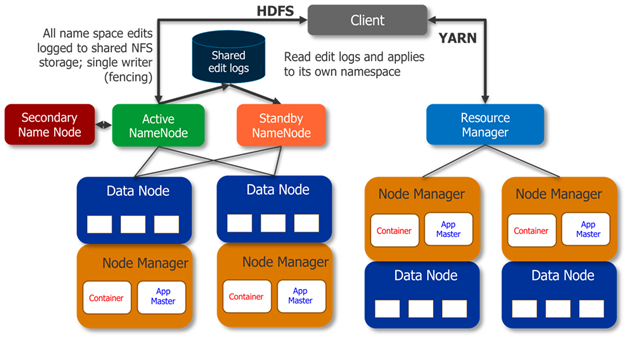

In [3]:
Image(filename='imgs/hadoop-arch.png') 

# Configura  Hadoop y lanza tu primer job

Los siguientes comandos tienes que hacerlos desde un terminal de la máquina virtual del curso

###1) Instala el editor `nano` si no te sientes cómodo con `vi`

    > sudo yum install nano


###2) Actualiza las variables de entorno para Hadoop

    > nano .bashrc
    
Añade al final del archivo:

    export PATH=/opt/anaconda/bin:$PATH
    export HADOOP_HOME=/usr/hdp/current/hadoop-client

Cierra el termina y abre uno nuevo

### 3) Ajusta la configuración WebUI de HDFS  y mapreduce

    > sudo nano /etc/hadoop/conf/hdfs-site.xml

Modifical la entrada con `dfs.namenode.http-address` para que quede así 
    
    <property>
      <name>dfs.namenode.http-address</name>
      <value>0.0.0.0:50070</value>
      <final>true</final>
    </property>
    

### 4) Añade el mapeo de puertos adicionales a Virtual Box

En Machine -> Settings -> Netowork -> Port Forwarding, añade una entrada para el puerto 8088 y otra para el puerto 19888 de manera que el puerto _host_ y el puerto _guest_ sean iguales. El nombre de cada entrada es solamente por referencia, usa el que quieras.
    
### 5) Repara la distribución de mr-job
     
     > sudo nano /opt/anaconda/lib/python2.7/site-packages/mrjob/hadoop.py

modifica la línea 273 para que quede:

    self.invoke_hadoop(['fs', '-mkdir', '-p', path])
    
### 6) Arranca los servicios **HDFS** y **MAPREDUCE** de Hadoop
    
    > sudo hadoop-start-hdfs.sh
    > sudo hadoop-start-yarnmr.sh
    
### 7) Verifica que los servicios arrancaron

abre con tu navegador desde la máquina física:
    
    http://localhost:50070
    http://localhost:8188
    http://localhost:8088

### 8) Lanza tu proceso mr-job con hadoop

    > cd 20151.bigd.uis.pre
    > python files/mr-basico.py -r hadoop  --hadoop-streaming-jar /usr/hdp/2.2.0.0-2041//hadoop-mapreduce/hadoop-streaming.jar --hdfs-scratch-dir /tmp data/compras.txt
    

# Jobs sobre HDFS inspeccionando resultados y métricas


###1) Transfiere el fichero de entrada desde tu desktop a HDFS

    > hdfs dfs -copyFromLocal data/compras.txt
  
Comprueba su estado en HDFS abriendo el navegador en http://localhost:50070 y seleccionando Utilities -> Browse the file system. Inspecciona la carpeta `/user/user`.

###2) Lanza el proceso mr-job

Igual que anteriormente, pero esta vez usando el fichero que ya está transferido a HDFS e indicándole que deje la salida producida también en HDFS

    > python files/mr-basico.py -r hadoop  --hadoop-streaming-jar /usr/hdp/2.2.0.0-2041//hadoop-mapreduce/hadoop-streaming.jar --hdfs-scratch-dir /tmp --output-dir hdfs:///user/user/output hdfs:///user/user/compras.txt  
    
###3) Recupera los ficheros de salida desde HDFS

Inspecciona primero el contenido de la carpeta `/user/user` y ejecuta el siguiente comando para copiar en tu desktop el directorio de salida del job anterior desde HDFS

    > hdfs dfs -copyToLocal output
    
Verifica el contenido del fichero producido

    > cat output/part-00000
    
###4) Inspecciona las métricas de ejecución

abre el navegador de la máquina física en 

    http://localhost:19888

¿cuantas tareas MAP hubo? ¿cuantos registros de entrada hubo para las tareas MAP? ¿y para las tareas REDUCE?

## <font style="color: red"> ANTES DE APAGAR LA MÁQUINA VIRTUAL DEBERÁS DE PARAR LOS SERVICIOS DE HADOOP

    > sudo hadoop-stop-yarnmr.sh
    > sudo hadoop-stop-hdfs.sh
    